# Week 3 Lab  
  
  ## Logistic Regression, LDA, QDA, and KNN

#### Stock Market Data

In [4]:
library(ISLR)

In [5]:
names(Smarket)
dim(Smarket)
summary(Smarket)

[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

[1] 1250    9

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

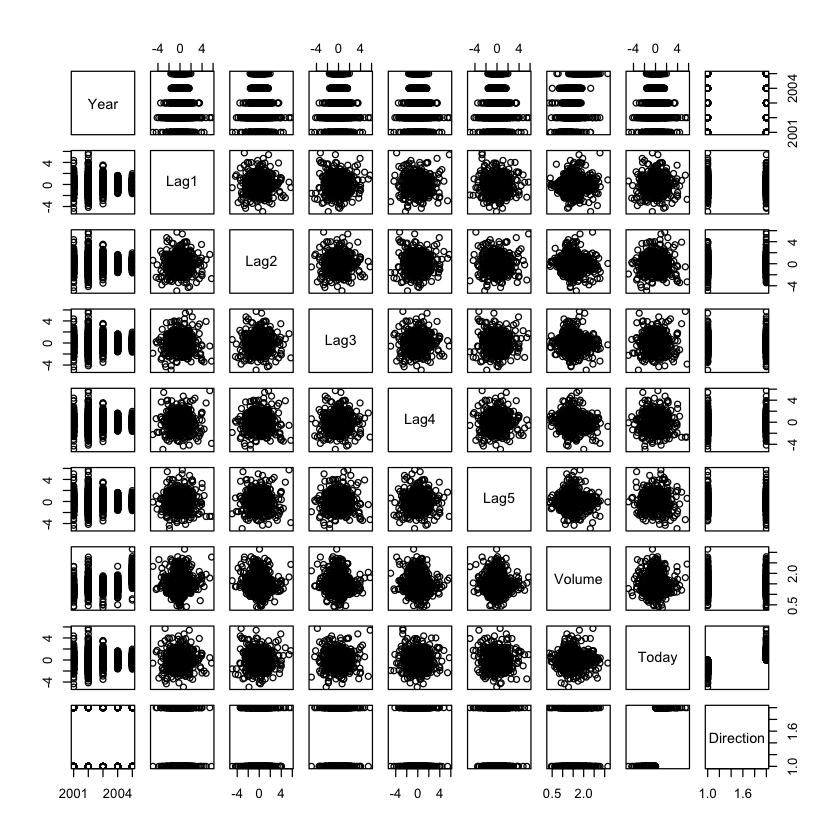

In [6]:
pairs(Smarket) # No obvious patterns or relationships between any of the variables

In [7]:
cor(Smarket[,-9]) 
# Largest correlation is between volume and year, indicating that more shares are being traded over time

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,0.029699649,0.030596422,0.033194581,0.035688718,0.029787995,0.53900647,0.030095229
Lag1,0.02969965,1.000000000,-0.026294328,-0.010803402,-0.002985911,-0.005674606,0.04090991,-0.026155045
Lag2,0.03059642,-0.026294328,1.000000000,-0.025896670,-0.010853533,-0.003557949,-0.04338321,-0.010250033
Lag3,0.03319458,-0.010803402,-0.025896670,1.000000000,-0.024051036,-0.018808338,-0.04182369,-0.002447647
Lag4,0.03568872,-0.002985911,-0.010853533,-0.024051036,1.000000000,-0.027083641,-0.04841425,-0.006899527
Lag5,0.02978799,-0.005674606,-0.003557949,-0.018808338,-0.027083641,1.000000000,-0.02200231,-0.034860083
Volume,0.53900647,0.040909908,-0.043383215,-0.041823686,-0.048414246,-0.022002315,1.00000000,0.014591823
Today,0.03009523,-0.026155045,-0.010250033,-0.002447647,-0.006899527,-0.034860083,0.01459182,1.000000000


The following objects are masked from Smarket (pos = 3):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year



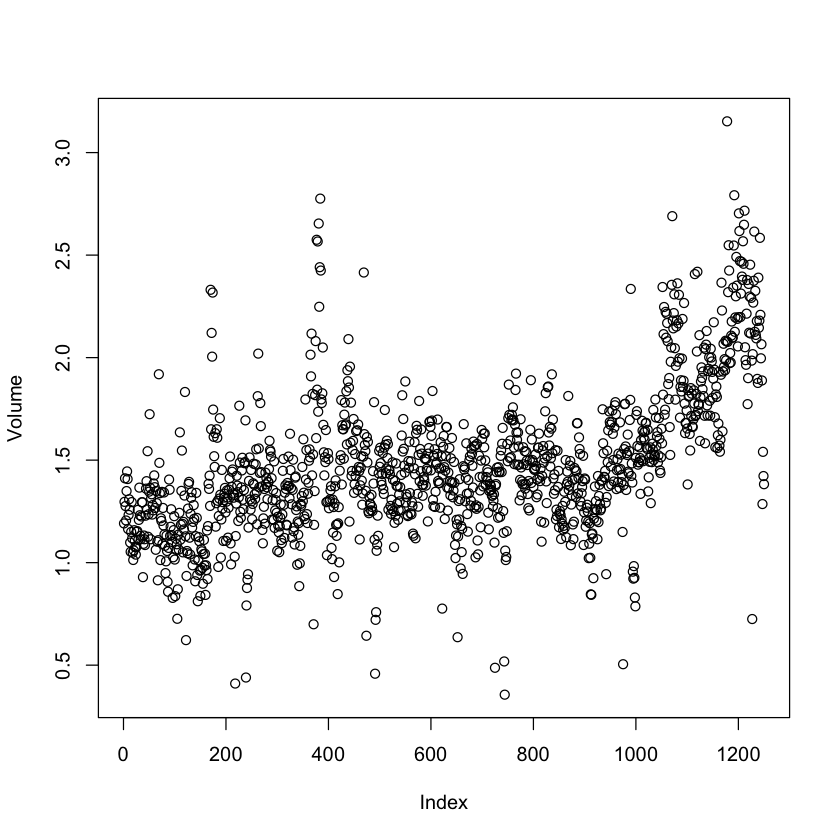

In [8]:
attach(Smarket)
plot(Volume)

Now we fit a logistic regression model to predict `Direction` using `Volume` and `Lag1` through `Lag5`

In [9]:
logistic.fit <- glm(Direction ~ 1 + Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data = Smarket, family = 'binomial')
summary(logistic.fit)


Call:
glm(formula = Direction ~ 1 + Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = "binomial", data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


In [10]:
coef(logistic.fit) # Use coef() to get just coeficcient values

(Intercept)         Lag1         Lag2         Lag3         Lag4         Lag5 
-0.126000257 -0.073073746 -0.042301344  0.011085108  0.009358938  0.010313068 
      Volume 
 0.135440659

In [11]:
summary(logistic.fit)$coef # Use summary()$coef to get coefficients and z/p values and std. errors

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-0.126000257,0.24073574,-0.5233966,0.6006983
Lag1,-0.073073746,0.05016739,-1.4565986,0.1452272
Lag2,-0.042301344,0.05008605,-0.8445733,0.3983491
Lag3,0.011085108,0.04993854,0.2219750,0.8243333
Lag4,0.009358938,0.04997413,0.1872757,0.8514445
Lag5,0.010313068,0.04951146,0.2082966,0.8349974
Volume,0.135440659,0.15835970,0.8552723,0.3924004


In [12]:
summary(logistic.fit)$coef[,4] # Can index summary()$coef to get specific columns or rows. Here we just get p values

(Intercept)        Lag1        Lag2        Lag3        Lag4        Lag5 
  0.6006983   0.1452272   0.3983491   0.8243333   0.8514445   0.8349974 
     Volume 
  0.3924004

The `predict()` function can be used to predict the probability that the market will go up, given the values of the predictors. Thee `type = 'response'` option tells `R` to output probabilities of the form $P(Y = 1 | X)$, as opposed to other information such as the logit. If no data set is supplied to the `predict()` function, then the probabiliites are computed for the training data.

In [13]:
logistic.probs <- predict(logistic.fit, type = 'response')
logistic.probs[1:10]

1         2         3         4         5         6         7         8 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812 0.5069565 0.4926509 0.5092292 
        9        10 
0.5176135 0.4888378

In [14]:
contrasts(Direction) # Shows us that value of 1 is associated with upward movement in the stock index

,Up
Down,0
Up,1


In order to make a prediction as to whether the market will go up or down on a particular day, we must convert these predicted probabilities into class labels, `Up` or `Down`. The following commands create a vector of class predictions based on whether the predicted probability of a market increase is greater than or less than 0.5.

In [15]:
logistic.pred <- rep('Down', 1250) # initially set all 1250 values to Down
logistic.pred[logistic.probs > 0.5] <- 'Up' # Change prediction to 'up' for values with probabilities > 0.5

We can easily create a confusion matrix using `table()` to determine how many observations were correctly or incorrectly classified.

In [16]:
table(logistic.pred, Direction)

             Direction
logistic.pred Down  Up
         Down  145 141
         Up    457 507

Here we see that we correctly predicted the market going up on 507 days and correctly predicted it going down on 145 days, for a total of 652 correct predictions. Can use `mean()` function to compute the fraction of days for which our prediction was correct.

In [17]:
mean(logistic.pred == Direction)

[1] 0.5216

We can see here that we have a correct classification approximatly 52% of the time, meaning our training error rate is ~48%. Not great. Who knew predicting the stock market was hard?

To get a better estimate of how our model will generalize to future stock market returns, we will train the model using years 2001-2004 and will test our model on the 2005 data.

In [18]:
train <- (Year < 2005)
Smarket.2005 <- Smarket[!train,]
dim(Smarket.2005)
Direction.2005 <- Direction[!train]

[1] 252   9

We now fit a logistic regression model using only the subset of observations that correspond to dates before 2005, using the `subset` argument. We then obtain predicted probabilities of the stock market going up for each of the days in our test set (days in 2005).

In [19]:
logistic.fit <- glm(Direction ~ 1 + Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, 
                     data = Smarket, family = 'binomial', subset = train)
logistic.probs <- predict(logistic.fit, Smarket.2005, type = 'response')

Now we compute the predictions for 2005 and compare them to the actual stock market movements for that year.

In [20]:
class(Smarket.2005)

[1] "data.frame"

In [21]:
logistic.pred <- rep('Down', 252)
logistic.pred[logistic.probs > 0.5] <- 'Up'
table(logistic.pred, Direction.2005)

             Direction.2005
logistic.pred Down Up
         Down   77 97
         Up     34 44

In [22]:
mean(logistic.pred == Direction.2005)

[1] 0.4801587

Here we see that our test error is approximately 1 - .48 = 52%. Very not good.

Perhaps we can do better by eliminating some of the least significant predictors. Below we refit the regression using only `Lag1` and `Lag2`, which had the lowest p values in our original regression.

In [23]:
logistic.fit <- glm(Direction ~ 1 + Lag1 + Lag2, data = Smarket, family = 'binomial', subset = train)
logistic.probs <- predict(logistic.fit, Smarket.2005, type = 'response')
logistic.pred <- rep('Down', 252)
logistic.pred[logistic.probs > 0.5] <- 'Up'
table(logistic.pred, Direction.2005)

             Direction.2005
logistic.pred Down  Up
         Down   35  35
         Up     76 106

In [24]:
mean(logistic.pred == Direction.2005)

[1] 0.5595238

Suppose we want to predict returns associated with particular values of `Lag1` and `Lag2`. In particular, we want to predict `Direction` on a day when `Lag1` is 1.2 and `Lag2` is 1.1, and on a day when `Lag1` is 1.5 and `Lag2` is -0.8. We can use the `predict()` function for this as well.

In [25]:
predict(logistic.fit, newdata = data.frame(Lag1 = c(1.2,1.5), Lag2 = c(1.1, -0.8)), type = 'response')

1         2 
0.4791462 0.4960939

## Linear Discriminant Analysis

Now we will perform LDA on the `Smarket` data set. In `R`, we fit an LDA model using the `lda()` function, which is part of the `MASS` library. The syntax forr the LDA function is identical to that of `lm()`. As above, we fit the model using only the observations before 2005.

In [26]:
library(MASS)

In [27]:
lda.fit <- lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)
lda.fit

Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

The LDA output indicates that $\hat{\pi}_1 = 0.492$ and $\hat{\pi}_2 = 0.508$. In other words, 50.8%% of the training observations correspond to days during which the market went up. The output also provides group means, which are the average of each predictorr within each class, and are used by LDA as estimates of $\mu_k$. These suggest that there is a tendency for the previous two days' returns to be negative on days when the market increases, and a tendency for the previous days' returns to be positive on days when the market declines. The *coefficients of linear discriminants* output provides the linear combination of `Lag1` and `Lag2` that are used to form the LDA decision boundary. If $-0.642 \times Lag1 - 0.514 \times Lag2$ is large, then the classifier will predict a market increase, and if it is small, then the classifer will predict a market decline. The `plot()` function produces plots of the linear discriminants, obtained by computing $-0.642 \times Lag1 - 0.514 \times Lag2$ for each of the training observations.

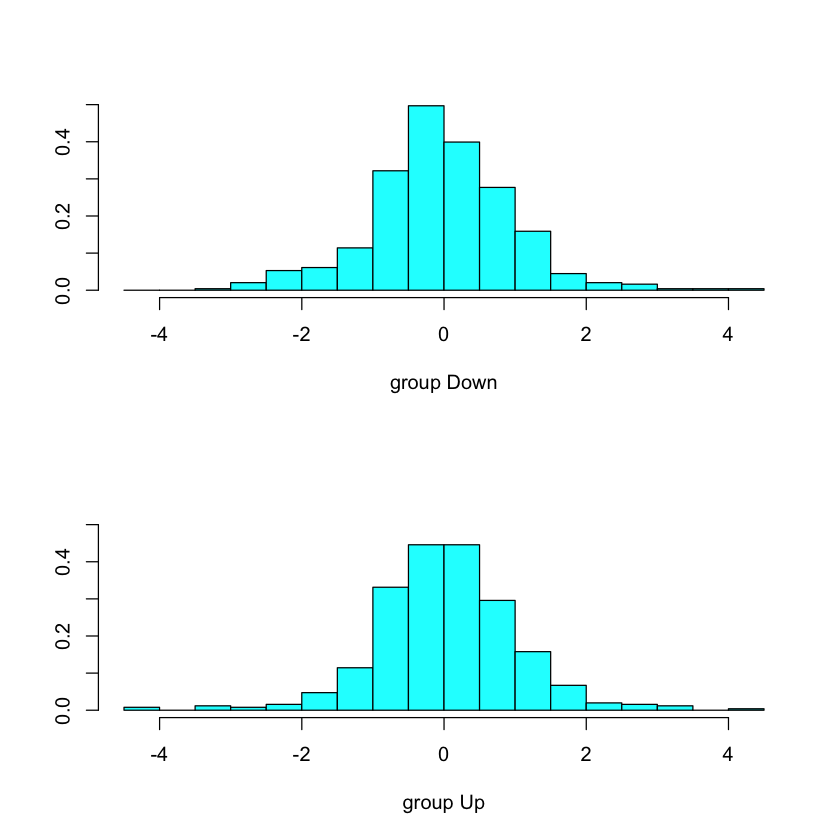

In [28]:
plot(lda.fit)

The `predict()` function returns a list with three elements. The first element, `class`, contains LDA's predictions about thee movement of the market. The second element, `posterior`, is a matrix whose $k$th column contains the posterior probability that the corresponding observation belongs to the $k$th class. `x` contains the linear discriminants, described earlier.

In [29]:
lda.pred <- predict(lda.fit, Smarket.2005)
names(lda.pred)

[1] "class"     "posterior" "x"

Notice that LDA and logistic regression predictions are almost identical

In [30]:
table(lda.pred$class, Direction.2005)
mean(lda.pred$class == Direction.2005)

      Direction.2005
       Down  Up
  Down   35  35
  Up     76 106

[1] 0.5595238

Applying a 50% threshold to the posterior probabilities allows us to recreate the preditions contained in `lda.pred$class`.

In [31]:
sum(lda.pred$posterior[,1] >= 0.5) # sum of the first row of confusion matrix. Predicted downs

[1] 70

In [32]:
sum(lda.pred$posterior[,1] < 0.5) # sum of second row of confusion matrix. Predicted ups

[1] 182

Notice that in this case, the posterior probability output by the model corresponds to the pobability that the market will go *down*.

In [33]:
lda.pred$posterior[1:20,1]

999      1000      1001      1002      1003      1004      1005      1006 
0.4901792 0.4792185 0.4668185 0.4740011 0.4927877 0.4938562 0.4951016 0.4872861 
     1007      1008      1009      1010      1011      1012      1013      1014 
0.4907013 0.4844026 0.4906963 0.5119988 0.4895152 0.4706761 0.4744593 0.4799583 
     1015      1016      1017      1018 
0.4935775 0.5030894 0.4978806 0.4886331

In [34]:
lda.pred$class[1:20]

[1] Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Down Up   Up   Up  
[16] Up   Up   Down Up   Up  
Levels: Down Up

If we wanted to use a posteerior probability threshold other than 50% in order to make predictions, then we could do so. For example, suppose that we wish to predict a market decrease only if we are very certain that the market will indeed decrease on that day -- say, if the posterior probability is at least 75%.

In [35]:
sum(lda.pred$posterior[,1] > 0.75) # No days in 2005 meet this threshold

[1] 0

In [36]:
max(lda.pred$posterior[,1]) # Highest posterior probability of downard movement in all of 2005.

[1] 0.520235

Can use this method to change our predictions and create a new confusion matrix

In [37]:
lda.pred$class[] <- 'Up'

In [38]:
lda.pred$class[lda.pred$posterior[,1] > 0.52] <- 'Down'

In [39]:
table(lda.pred$class, Direction.2005)

      Direction.2005
       Down  Up
  Down    1   0
  Up    110 141

In [40]:
mean(lda.pred$class == Direction.2005)

[1] 0.5634921

## Quadratic Discriminant Analysis

Now we'll fit a QDA model to the `Smarket` data set. QDA is implemented in R using the `qda()` function, which is also part of the `MASS` library. Syntax is identical to `lda()`.

In [41]:
qda.fit <- qda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)
qda.fit

Call:
qda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

The output contains the group means, but does not contain the coefficients of the linear discriminants, because the QDA classifierr involves a quadratic, rather than a linear, function of the predictors. The `predict()` function works exactly the same as it does for LDA.

In [42]:
plot(qda.fit) # Can't plot QDA like we can for LDA

ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): 'x' is a list, but does not have components 'x' and 'y'


In [43]:
qda.pred <- predict(qda.fit, Smarket.2005)

In [44]:
table(qda.pred$class, Direction.2005)

      Direction.2005
       Down  Up
  Down   30  20
  Up     81 121

In [45]:
mean(qda.pred$class == Direction.2005)

[1] 0.5992063

The QDA predictions are accurate almost 60% of the time, which is not bad. This level of accuracy is quite impressive for stock market data, which is notoriously hard to model accurately. This suggests that the quadratic form assumed by QDA may capture the true relationship more accurately than the linear forms assumed by LDA and logistic regression.

## K-Nearest Neighbors

KNN can be performed using the `knn()` function, which is part of the `class` library. Unlike the other model-fitting functions used above, which require two steps--one for fitting the model and one for making predictions--`knn()` forms predictions using a single command. The function requires four inputs.  
  
  1. A matrix containing the predictors associated with the training data, labeled `train.X` below.  
  2. A matrix containing the predictors associated with the data for which we wish to make predictions, labeled `test.X` below.  
  3. A vector containing the class labels for the training observations, labeled `train.Direction` below.  
  4. A value for K, the number of nearest neighbors to be used by the classifier.

Use the `cbind()` function to bind the `Lag1` and `Lag2` variables into two matrices, one for the training set and one for the test set.

In [46]:
library(class)
train.X <- cbind(Lag1,Lag2)[train,]
test.X <- cbind(Lag1,Lag2)[!train,]
train.Direction <- Direction[train]

In [47]:
dim(train.X)
dim(test.X)

[1] 998   2

[1] 252   2

now the `knn()` function can be used to predict the market's movement for the dates in 2005. We set a random seed before we apply `knn()` because if multiple observations are tied as nearest neighbors, then R will randomly break the tie. Therefore, we must set a seed to ensure reproducibility.

In [48]:
set.seed(1)
knn.pred <- knn(train.X, test.X, train.Direction, k = 1)
table(knn.pred, Direction.2005)
mean(knn.pred == Direction.2005)

        Direction.2005
knn.pred Down Up
    Down   43 58
    Up     68 83

[1] 0.5

50% isn't very good. Let's try again with K = 3

In [49]:
knn.pred <- knn(train.X, test.X, train.Direction, k = 3)
table(knn.pred, Direction.2005)
mean(knn.pred == Direction.2005)

        Direction.2005
knn.pred Down Up
    Down   48 54
    Up     63 87

[1] 0.5357143

A little bit better, but not much.

# Applying our new knowledge to caravan insurance data

We will now apply KNN to the `Caravan` dataset. The data includes 85 predictors that measure demographic characteristics for 5,822 individuals. The response variable is `Purchase`, which is a binary variable to indicate whether or not a given individual makes a purchase of caravan insurance. In the data seet, 6% of people purchased caravan insurance.

In [50]:
attach(Caravan)
dim(Caravan)
summary(Purchase)
mean(Purchase == 'Yes')

[1] 5822   86

No  Yes 
5474  348

[1] 0.05977327

Because KNN predicts the class of a test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale. For example, if we had a dat set with two variables, `Age` and `Salary` (measured in years and dollars, respectively), KNN treats a difference of $1,000 in salary as a much larger difference than 50 years in age. Additionally, KNN would give totally different results if we measured `Salary` in Japanese yen, or if we measured `age` in minutes.

A good way to handle this problem is to standardize the data so that all variables are given a mean of zero and a standard deviation of one. Then all variables will be on a comparable scale. The `scale()` function does just thtis. In standardizing the data, we exclude column 86, because that is the qualitative `Purchase` variable.

In [66]:
standardized.X <- scale(Caravan[,-86])

In [67]:
var(Caravan[,1])

[1] 165.0378

In [68]:
var(Caravan[,2])

[1] 0.1647078

In [69]:
var(standardized.X[,1])

[1] 1

In [70]:
var(standardized.X[,2])

[1] 1

Now we split the data into a test set, containing the first 1000 observations, and a training set containing the remaining observations. We fit a KNN model on the training data using K = 1, and evaluate its performance on the test data.

In [72]:
test <- 1:1000
train.X <- standardized.X[-test,]
test.X <- standardized.X[test,]
train.Y <- Purchase[-test]
test.Y <- Purchase[test]
set.seed(1)
knn.pred <- knn(train.X, test.X, train.Y, k = 1)

In [73]:
mean(test.Y == knn.pred)

[1] 0.882

In [74]:
mean(test.Y == 'Yes')

[1] 0.059

Our test error rate here is ~12%. Although this may seem good, notice that the true number of Yeses is only 6%, so we could have gotten an error rate of 6% by predicting No on every single observation, regardless of the predictors...  
  
  Suppose there is some cost to trying to sell insurance to a given individual. If the company tries to sell to a random selection of customers, then the success rate will only be around 6%, which may be too low given the costs involved. Instead, the company would like to try to sell insurance only to customers who are likely to buy it. For these purposes, the overall error rate is not of much importance. Instead, the fraction of individuals that are correctly predicted to buy insurance is of more interest.

In [75]:
table(knn.pred, test.Y)

        test.Y
knn.pred  No Yes
     No  873  50
     Yes  68   9

In [76]:
9/(68+9)

[1] 0.1168831

Here we see that, of the people we predicted would buy insurance, 11.7% actually did, which is almost double the overall sales rate of 6%, the rate one would obtain from random guessing.

In [80]:
knn.pred <- knn(train.X, test.X, train.Y, k = 3)
table(knn.pred, test.Y)

        test.Y
knn.pred  No Yes
     No  921  54
     Yes  20   5

In [81]:
5/(20 + 5)

[1] 0.2

Using k = 3, we have a true positive rate of 20%, which is much better than the original 6%.

In [83]:
knn.pred <- knn(train.X, test.X, train.Y, k = 5)
table(knn.pred, test.Y)

        test.Y
knn.pred  No Yes
     No  930  55
     Yes  11   4

In [84]:
4 / 15

[1] 0.2666667

Using k = 5, wee can increase our rate even more to 26.7%. Not bad!

## Same problem using logistic regression

In [86]:
log.fit <- glm(Purchase ~ ., data = Caravan, family = 'binomial', subset = -test)
log.probs <- predict(log.fit, Caravan[test,], type = 'response')

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

In [87]:
log.pred <- rep('No', 1000)
log.pred[log.probs > 0.5] <- 'Yes'
table(log.pred, Caravan[test, 'Purchase'])

        test.Y
log.pred  No Yes
     No  934  59
     Yes   7   0

Using logistic regression with a 0.5 threshold, we see that our results are not very good. We only predict that 7 people will buy insurance, and we are wrong about all of them! Let's run the regression again using a lower threshold.

In [92]:
log.pred <- rep('No', 1000)
log.pred[log.probs > 0.25] <- 'Yes'
table(log.pred, Caravan[test, 'Purchase'])

        
log.pred  No Yes
     No  919  48
     Yes  22  11

Using the lower threshold of 0.25 to predict a sale, we now have a success rate of 33%, which is over five times better than random guessing!